# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Online Retail.xlsx')

## Task 2: Data Cleaning

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.isnull().sum() 


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df = df.loc[df['Quantity'] > 0]

=> There are 'Quantities' below 0 and in order not to interfere with the analysis, they will be removed.

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [10]:
df = df.loc[df['UnitPrice'] > 0]

=> There are 'UnitPrice' below 0 and in order not to interfere with the analysis, they will be removed.

In [11]:
df.size

4240832

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [13]:
del df['CustomerID']

=> 'CustomerID' it was deleted because it does not influence this specific exploratory analysis.

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [15]:
df.describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [16]:
df.describe(include = object)

,InvoiceNo,StockCode,Description,Country
count,530104,530104,530104,530104
unique,19960,3922,4026,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2265,2323,485123


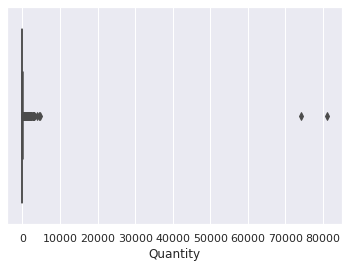

In [17]:
sns.set()
sns.boxplot(x='Quantity', data=df)

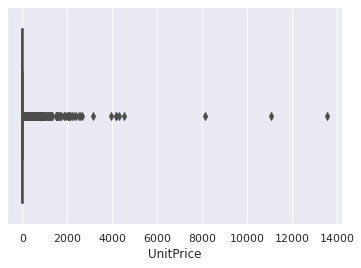

In [18]:
sns.boxplot(x='UnitPrice', data=df)

In [19]:
upper_quantity = df['Quantity'].quantile(0.75)
lower_quantity = df['Quantity'].quantile(0.25)

In [20]:
iqr_quantity = upper_quantity - lower_quantity
print(iqr_quantity)

9.0


In [21]:
upper = upper_quantity + (2 * iqr_quantity)
lower = lower_quantity - (2 * iqr_quantity)
print(upper, lower)

28.0 -17.0


In [22]:
df = df.loc[df['Quantity'] < 28.5]

=> The outliers were eliminated because there were orders with many quantities, probably errors.

In [23]:
df.size

3522652

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


Mean:  5.878230499124763 
Median:  3.0


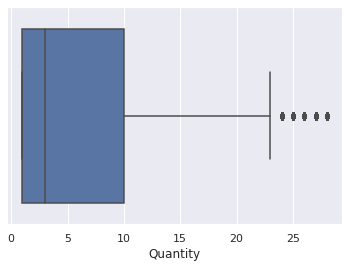

In [45]:
sns.boxplot(x='Quantity', data=df)
print('Mean: ', df['Quantity'].mean(), '\nMedian: ', df['Quantity'].median())

## 3: Data Transforming

In [26]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [27]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

=> We eliminated the last month as it was not complete and would influence the analysis.

In [28]:
df['InvoiceDate'].max()

Timestamp('2011-11-30 17:37:00')

In [29]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

In [30]:
df['Month'] = df['InvoiceDate'].dt.month

In [31]:
df['Price'] = df['Quantity'] * df['UnitPrice']

## 4: Data Analysing

In [32]:
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,DayOfWeek,Month,Price
445861,574863,37413,ICON MUG REVOLUTIONARY,6,2011-11-07 12:29:00,0.39,United Kingdom,0,11,2.34
36449,539451,90072,RUBY DROP CHANDELIER EARRINGS,1,2010-12-17 16:59:00,4.24,United Kingdom,4,12,4.24
244440,558532,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,1,2011-06-30 11:32:00,1.25,United Kingdom,3,6,1.25
48727,540473,21212,PACK OF 72 RETROSPOT CAKE CASES,3,2011-01-07 14:31:00,0.55,United Kingdom,4,1,1.65
291633,562466,21463,MIRRORED DISCO BALL,7,2011-08-05 11:49:00,5.95,United Kingdom,4,8,41.65
96547,544571,72351B,SET/6 PINK BUTTERFLY T-LIGHTS,12,2011-02-21 13:07:00,2.10,United Kingdom,0,2,25.20
114442,546013,22988,SOLDIERS EGG CUP,12,2011-03-08 16:38:00,1.25,United Kingdom,1,3,15.00
185357,552811,23170,REGENCY TEA PLATE ROSES,12,2011-05-11 12:43:00,1.65,United Kingdom,2,5,19.80
122493,546875,22922,FRIDGE MAGNETS US DINER ASSORTED,12,2011-03-17 16:38:00,0.85,Italy,3,3,10.20
298681,563032,23275,SET OF 3 HANGING OWLS OLLIE BEAK,12,2011-08-11 14:39:00,1.25,United Kingdom,3,8,15.00


In [33]:
top5_Desc = df['Description'].value_counts()
top5_Desc = top5_Desc.head(5)
top5_Desc = pd.DataFrame(top5_Desc)
top5_Desc

,Description
WHITE HANGING HEART T-LIGHT HOLDER,1917
REGENCY CAKESTAND 3 TIER,1859
JUMBO BAG RED RETROSPOT,1771
PARTY BUNTING,1530
LUNCH BAG RED RETROSPOT,1428


In [34]:
top5_Desc

,Description
WHITE HANGING HEART T-LIGHT HOLDER,1917
REGENCY CAKESTAND 3 TIER,1859
JUMBO BAG RED RETROSPOT,1771
PARTY BUNTING,1530
LUNCH BAG RED RETROSPOT,1428


Text(0.5, 1.0, 'Top 5 best-selling products')

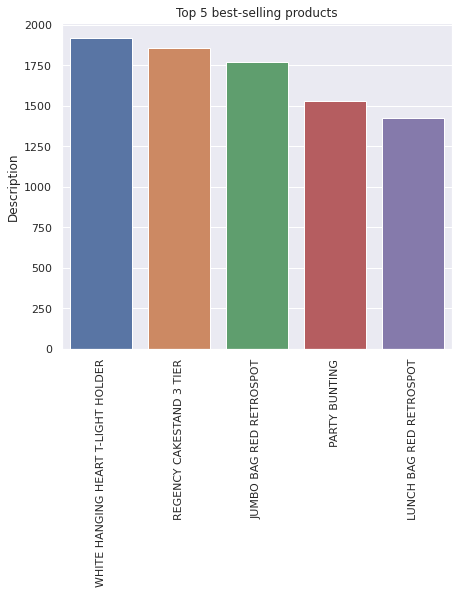

In [35]:
f, ax = plt.subplots(figsize=(7,6))
t = sns.barplot(x=top5_Desc.index, y='Description', data=top5_Desc)
t.set_xticklabels(labels=top5_Desc.index, rotation=90)
plt.title('Top 5 best-selling products')

In [36]:
top5_Country = df['Country'].value_counts()
top5_Country = top5_Country.head(5)
top5_Country = pd.DataFrame(top5_Country)
top5_Country

,Country
United Kingdom,441146
Germany,8221
France,7598
EIRE,6711
Spain,2314


Text(0, 0.5, 'Count')

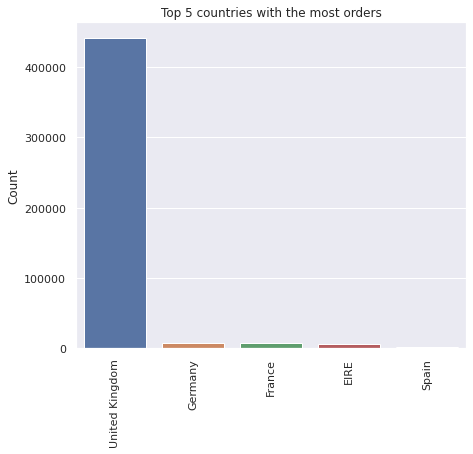

In [37]:
f, ax = plt.subplots(figsize=(7,6))
c = sns.barplot(x=top5_Country.index, y='Country', data=top5_Country)
c.set_xticklabels(labels=top5_Country.index, rotation=90)
plt.title('Top 5 countries with the most orders')
plt.ylabel('Count')

Text(0, 0.5, 'Sales')

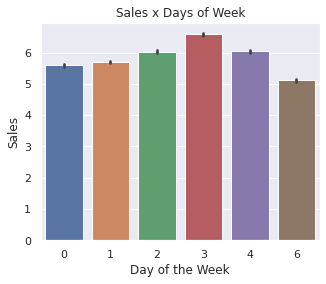

In [38]:
f, ax = plt.subplots(figsize=(5,4))
d = sns.barplot(x='DayOfWeek', y='Quantity', data=df)
plt.title('Sales x Days of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

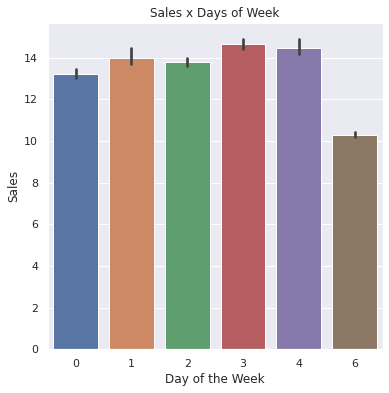

In [39]:
f, ax = plt.subplots(figsize=(6,6))
d = sns.barplot(x='DayOfWeek', y='Price', data=df)
plt.title('Sales x Days of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

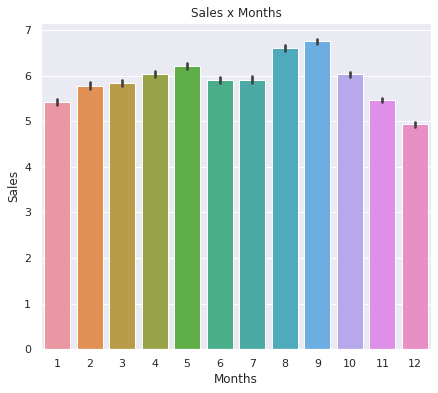

In [40]:
f, ax = plt.subplots(figsize=(7,6))
d = sns.barplot(x='Month', y='Quantity', data=df)
t.set_xticklabels(labels=top5_Desc.index, rotation=90)
plt.title('Sales x Months')
plt.xlabel('Months')
plt.ylabel('Sales')

Text(0, 0.5, 'Price')

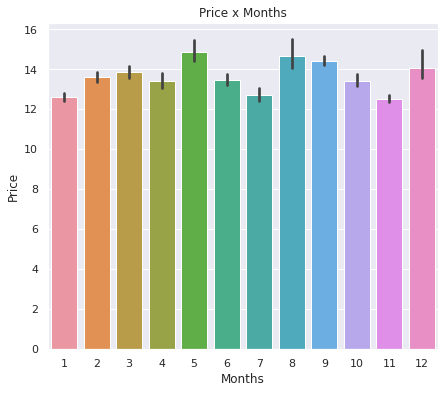

In [41]:
f, ax = plt.subplots(figsize=(7,6))
d = sns.barplot(x='Month', y='Price', data=df)
plt.title('Price x Months')
plt.xlabel('Months')
plt.ylabel('Price')

In [42]:
df.describe()

,Quantity,UnitPrice,DayOfWeek,Month,Price
count,479299.000000,479299.000000,479299.000000,479299.000000,479299.000000
mean,5.878230,4.025415,2.442709,7.341924,13.550988
std,6.298993,36.930529,1.864619,3.455202,40.164683
min,1.000000,0.001000,0.000000,1.000000,0.001000
25%,1.000000,1.250000,1.000000,4.000000,3.750000
50%,3.000000,2.100000,2.000000,8.000000,8.700000
75%,10.000000,4.130000,4.000000,10.000000,16.600000
max,28.000000,13541.330000,6.000000,12.000000,13541.330000


## 5: Final Report

The Data Analysis stages were successfully completed and several conclusions could be drawn:

1) The 5 best-selling items are: WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT, PARTY BUNTING, LUNCH BAG RED RETROSPOT. It is important to emphasize that these items can attract the purchase of others, so offering discounts on them can increase the company's ROI.

2) The United Kingdom is the place with the largest purchases, so special attention is essential in this case.

3) The day of the week with the highest sales of products is Thursday.

4) Thinking about the month with the most sales in terms of product quantity, it is the month of September, however the months in which the return is greatest are May and October.

Future recommendations:

1) Clustering of consumers to segment their purchasing habits and provide better quality marketing.

2) Use the a priori algorithm to understand how consumers form their shopping cart to improve the company's marketing.